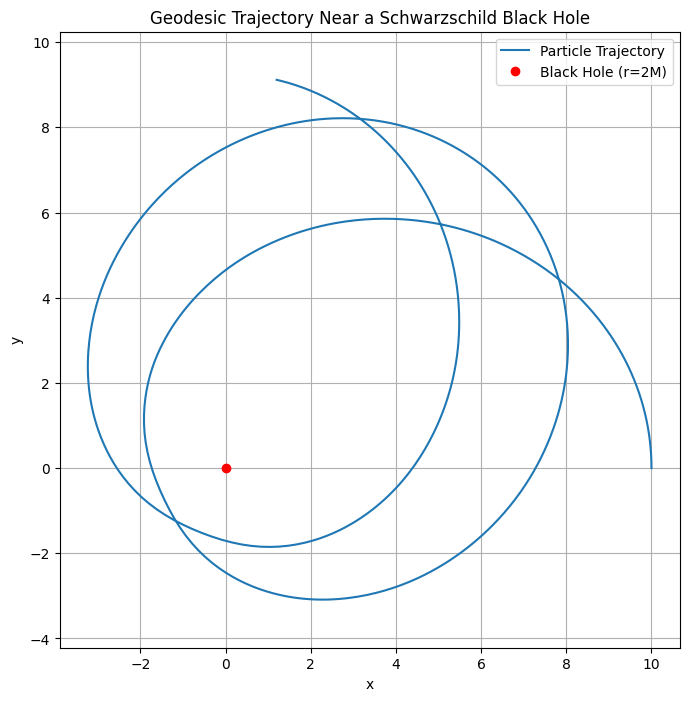

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def schwarzschild_geodesics(t, y, E, L):
    """
    Geodesic equations in Schwarzschild spacetime.
    
    Parameters:
    t: Proper time (not used directly as the equations are autonomous).
    y: Array of state variables [r, phi, dr/dtau, dphi/dtau].
    E: Energy per unit mass.
    L: Angular momentum per unit mass.
    
    Returns:
    dydt: Derivatives [dr/dtau, dphi/dtau, d^2r/dtau^2, d^2phi/dtau^2].
    """
    global r , phi, dr_dtau 
    r = y[0]
    phi = y[1]
    dr_dtau = y[2]
    
    # Effective potential components
    f = 1 - 2 / r  # Schwarzschild metric term
    
    # Equations of motion
    d2r_dtau2 = -f * (L**2 / r**3) + (2 / r**2) * (E**2 - f * (1 + L**2 / r**2))
    dphi_dtau = L / r**2
    
    return [dr_dtau, dphi_dtau, d2r_dtau2]
# Parameters
E = 0.95   # Energy per unit mass
L = 4.0    # Angular momentum per unit mass
r0 = 10.0  # Initial radial position
dr0_dtau = 0.0  # Initial radial velocity
phi0 = 0.0  # Initial azimuthal angle

# Initial conditions
y0 = [r0, phi0, dr0_dtau]

# Time span for integration
tau_span = (0, 100)
tau_eval = np.linspace(0, 100, 1000)

# Solve the geodesic equations
sol = solve_ivp(schwarzschild_geodesics, tau_span, y0, args=(E, L), t_eval=tau_eval, method='RK45')
r = sol.y[0]
phi = sol.y[1]

# Convert to Cartesian coordinates for plotting
x = r * np.cos(phi)
y = r * np.sin(phi)

plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Particle Trajectory")
plt.plot(0, 0, 'ro', label="Black Hole (r=2M)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Geodesic Trajectory Near a Schwarzschild Black Hole")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()
